In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target

import pickle

path = "data/california/synthetic_vs_original/synthetic_data_dict_ratio100.pkl"
with open(path , "rb") as f:
    synth_data = pickle.load(f)
    print(synth_data.keys())

n_features = X.shape[1]

dict_keys(['CTGAN', 'DDPM', 'GAN', 'VAE', 'COPULAGAN', 'TVAE'])


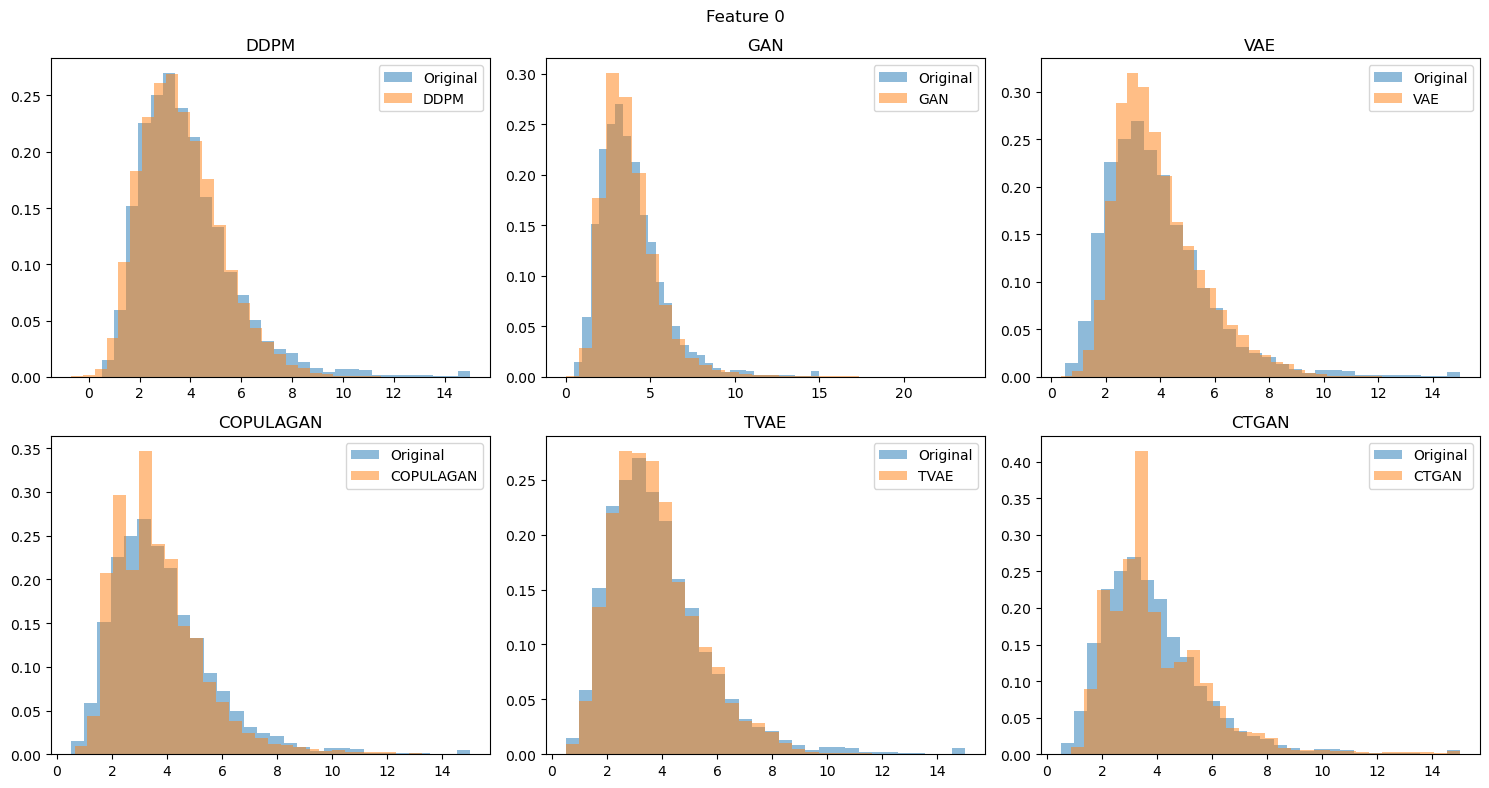

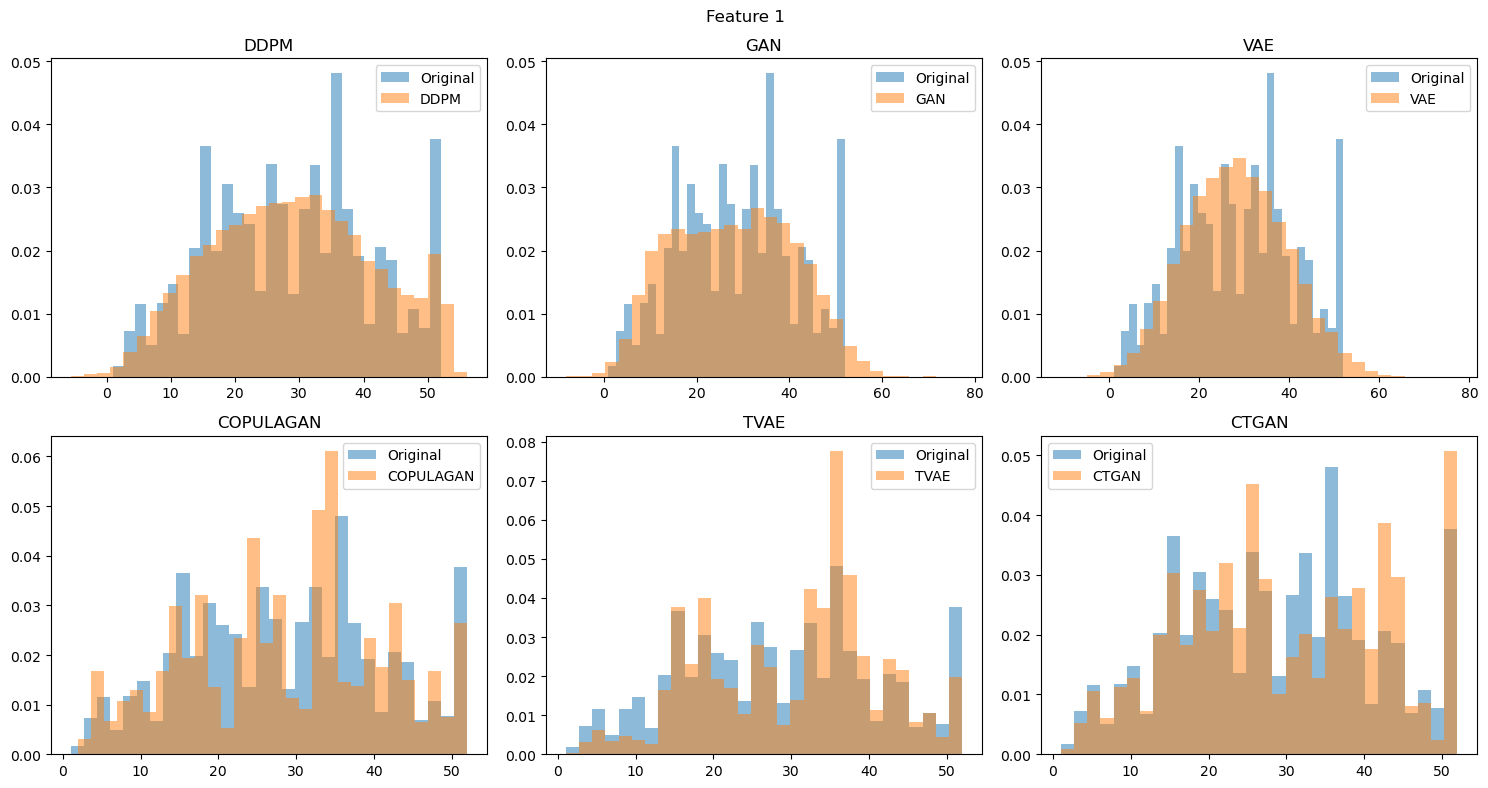

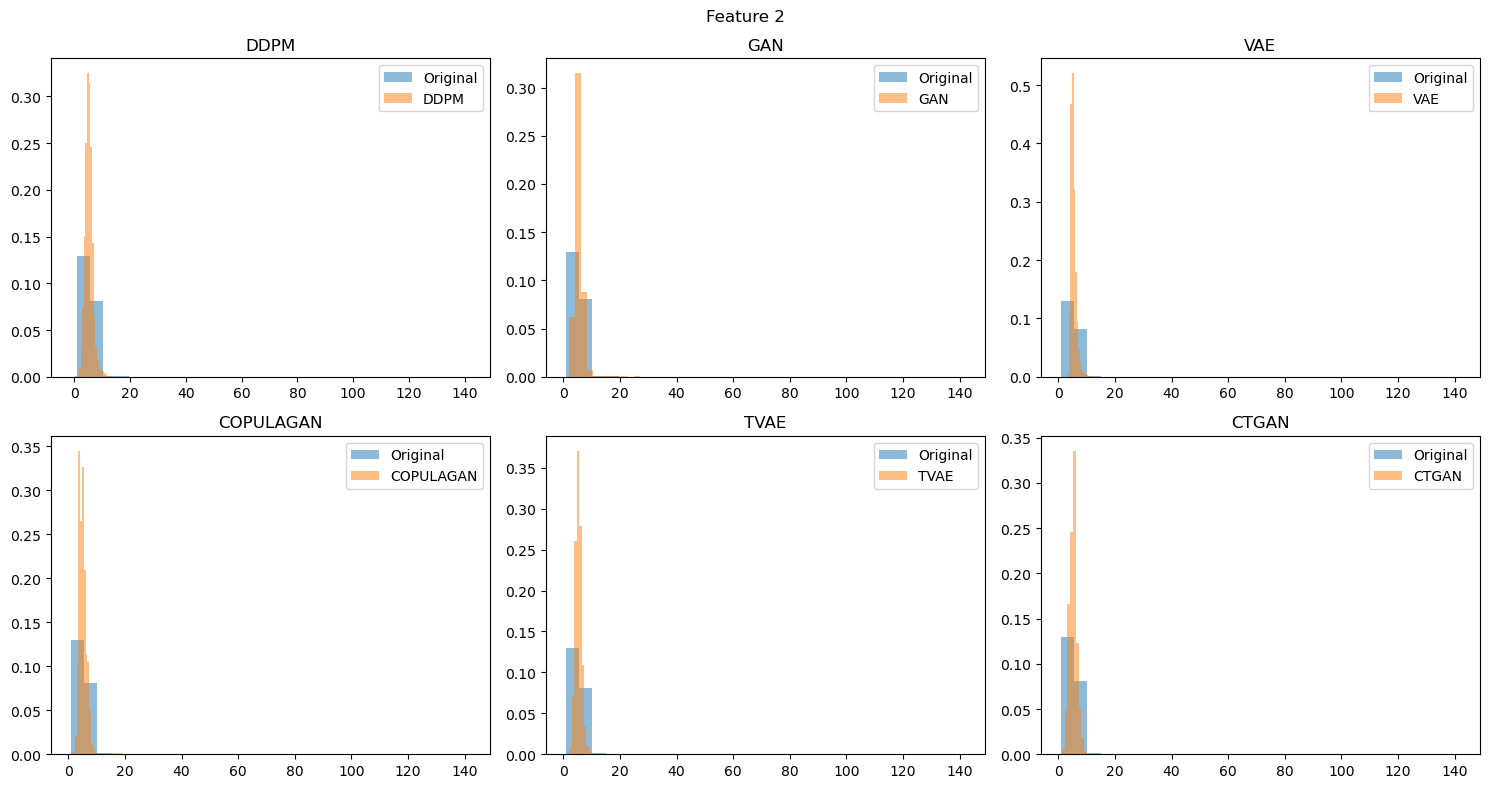

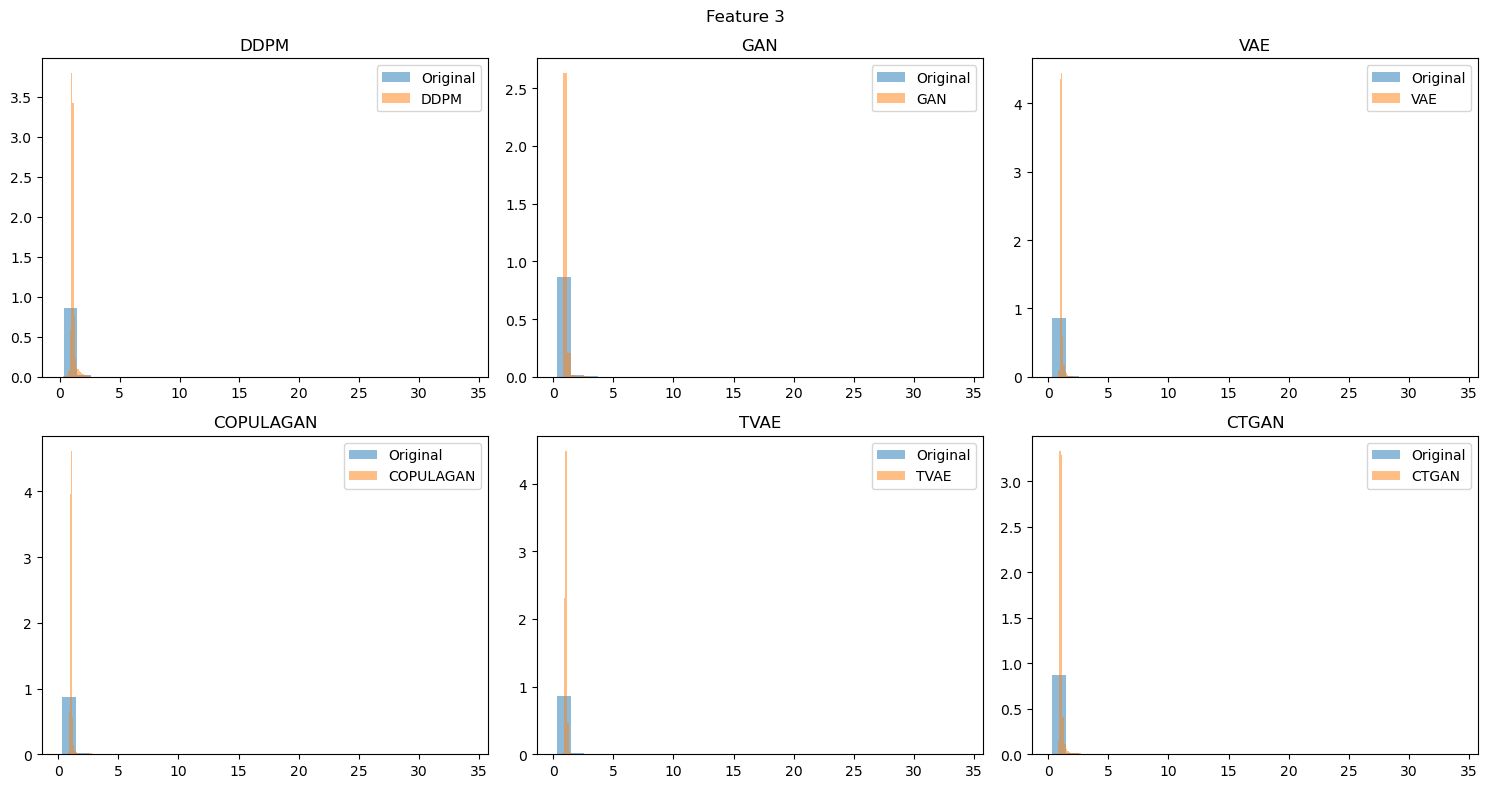

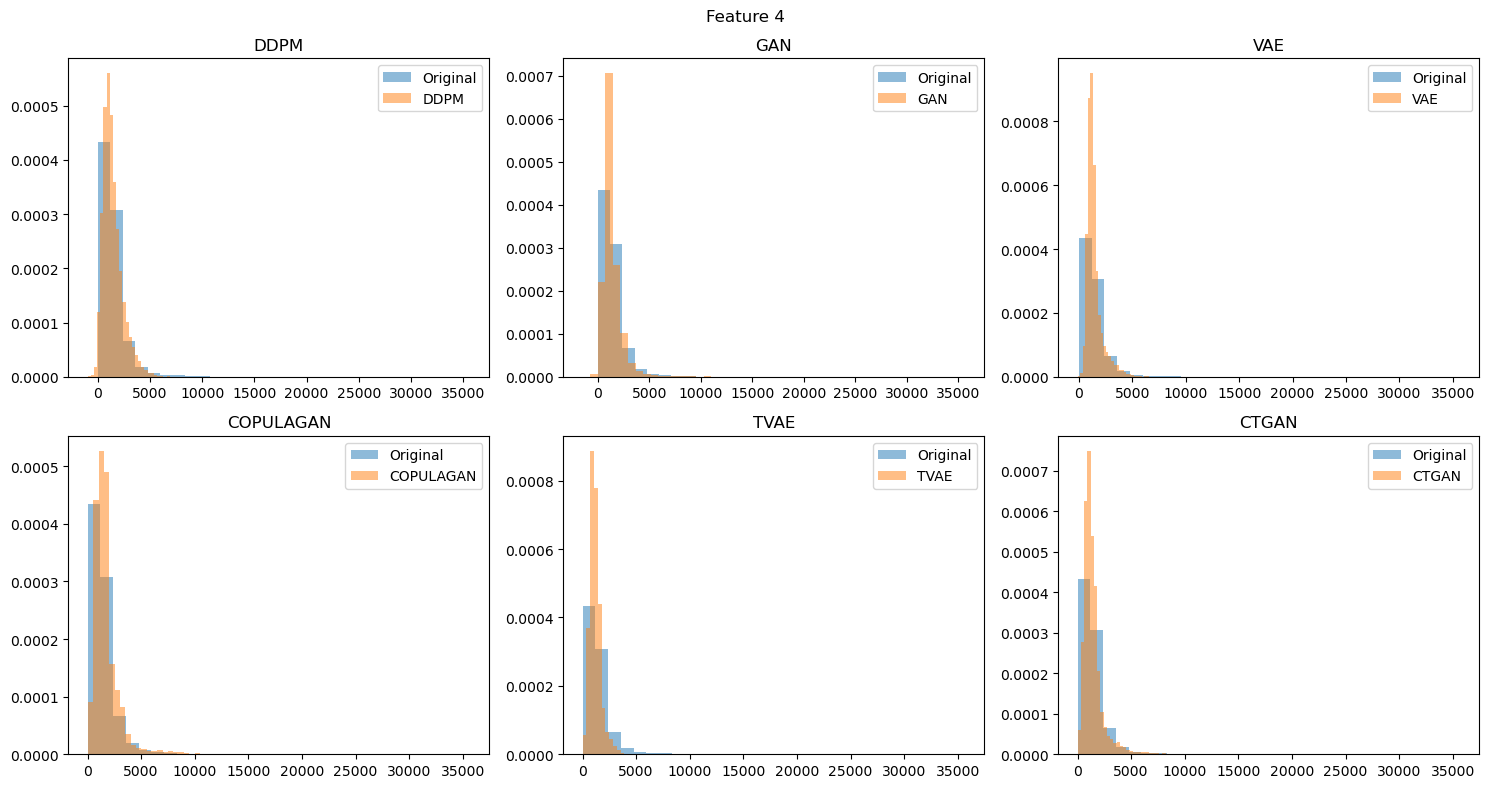

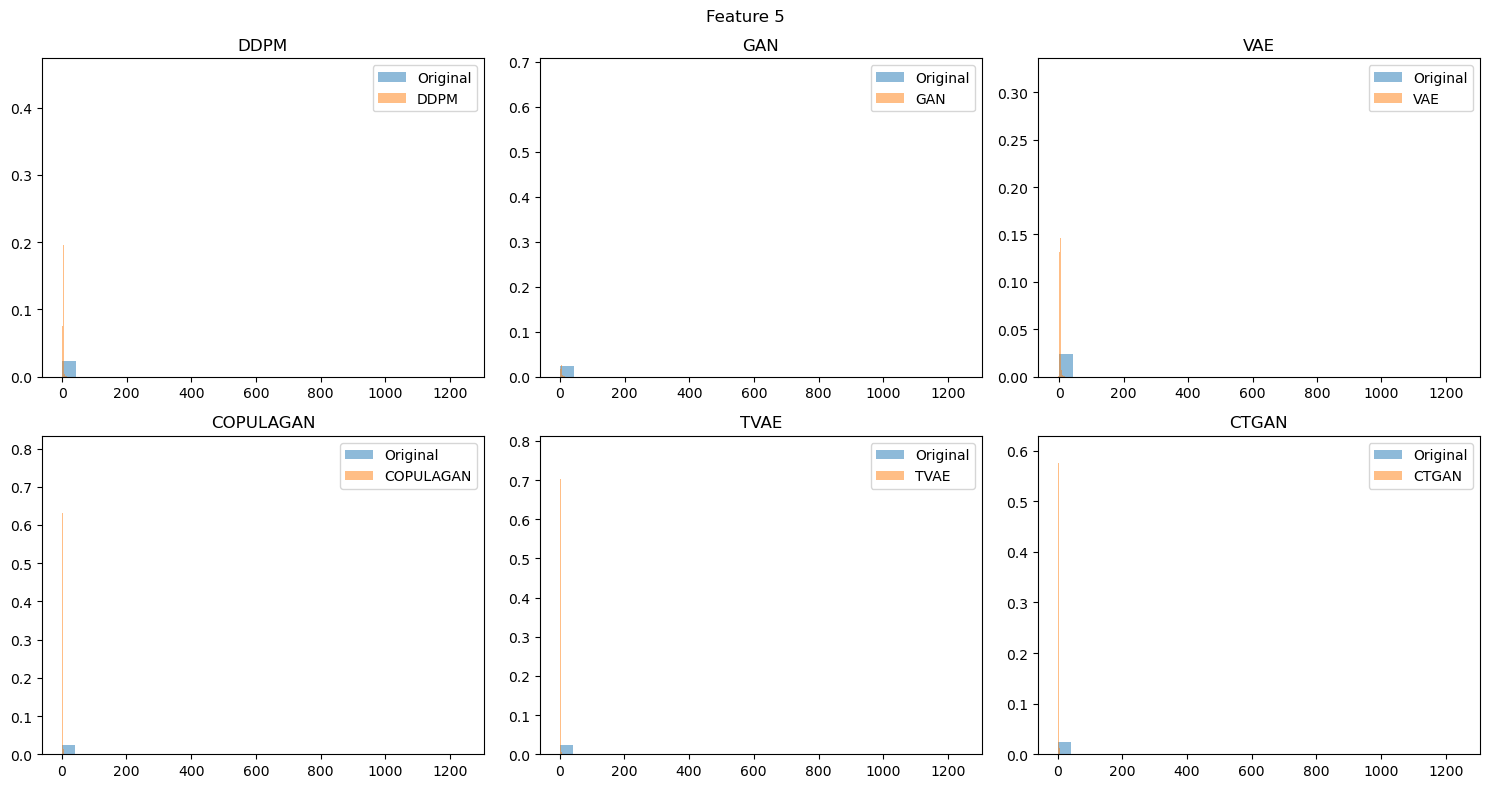

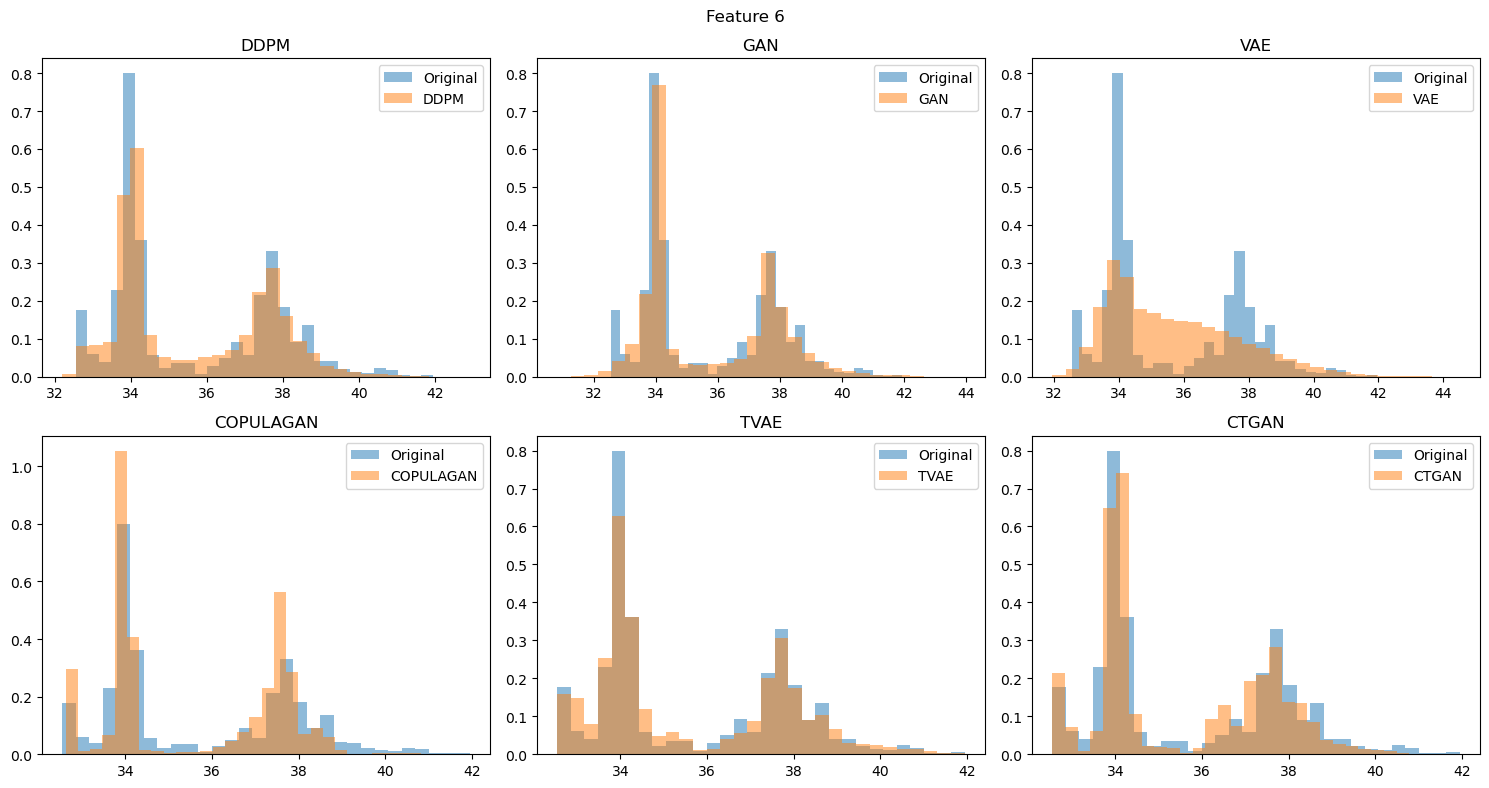

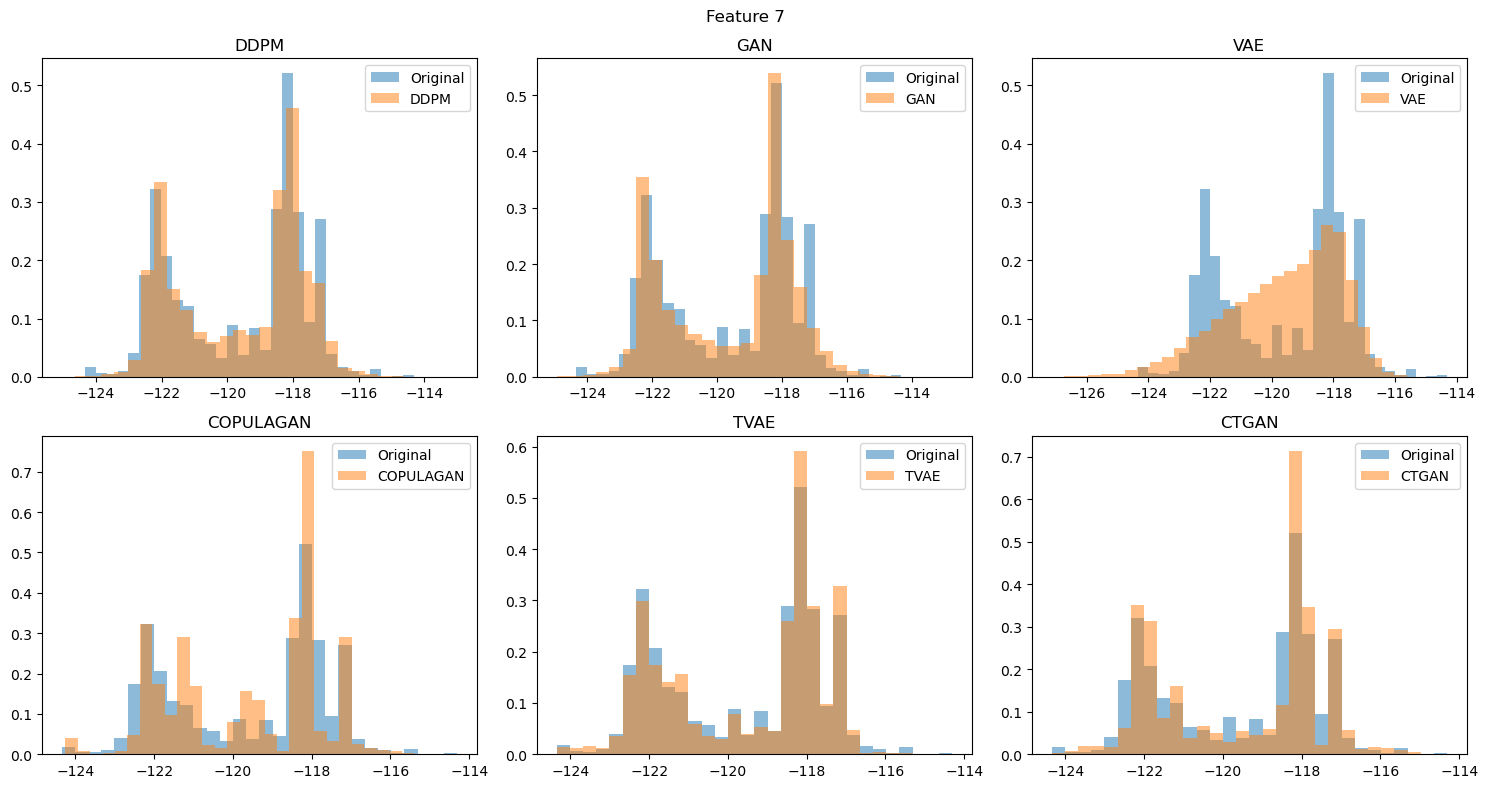

In [5]:
import matplotlib.pyplot as plt

models = {
    "DDPM": synth_data["DDPM"]["x"],
    "GAN": synth_data["GAN"]["x"],
    "VAE": synth_data["VAE"]["x"],
    "COPULAGAN": synth_data["COPULAGAN"]["x"],
    "TVAE": synth_data["TVAE"]["x"],
    "CTGAN": synth_data["CTGAN"]["x"],
}

for i in range(n_features):
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()

    for ax, (name, data) in zip(axes, models.items()):
        ax.hist(X[:, i], bins=30, density=True, alpha=0.5, label="Original")
        ax.hist(data[:, i], bins=30, density=True, alpha=0.5, label=name)
        ax.set_title(name)
        ax.legend()

    fig.suptitle(f"Feature {i}")
    plt.tight_layout()
    plt.show()